# Exploratory Data Analysis – E-commerce Fraud Dataset

This notebook explores the e-commerce fraud dataset to understand transaction behavior,
class imbalance, and geolocation-based fraud patterns. The insights here guide feature
engineering and model selection.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress

plt.style.use("default")


In [2]:
fraud_path = r"C:\Users\jkk\OneDrive\Desktop\fraud-detection\data\raw\Fraud_Data.csv"
ip_path = r"C:\Users\jkk\OneDrive\Desktop\fraud-detection\data\raw\IpAddress_to_Country.csv"

fraud_df = pd.read_csv(fraud_path)
ip_df = pd.read_csv(ip_path)

fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_since_signup,hour_of_day,day_of_week,transactions_per_user
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,8.724152e+08,8.891924e+08,United States,3564984.0,10,5,1
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,2.785542e+09,2.786066e+09,Switzerland,10039879.0,21,5,1
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,3.523215e+08,3.690988e+08,United States,6667201.0,11,3,1
3,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,2.985034e+09,2.985296e+09,Mexico,4631485.0,20,2,1
4,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,FROZWSSWOHZBE,Direct,IE,M,32,578312545,0,5.704253e+08,5.872026e+08,United States,3193080.0,12,3,1


In [3]:
fraud_df.info()
fraud_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   signup_time             129146 non-null  object 
 2   purchase_time           129146 non-null  object 
 3   purchase_value          129146 non-null  int64  
 4   device_id               129146 non-null  object 
 5   source                  129146 non-null  object 
 6   browser                 129146 non-null  object 
 7   sex                     129146 non-null  object 
 8   age                     129146 non-null  int64  
 9   ip_address              129146 non-null  int64  
 10  class                   129146 non-null  int64  
 11  lower_bound_ip_address  129146 non-null  float64
 12  upper_bound_ip_address  129146 non-null  float64
 13  country                 129146 non-null  object 
 14  time_since_signup   

,user_id,purchase_value,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,time_since_signup,hour_of_day,day_of_week,transactions_per_user
count,129146.000000,129146.000000,129146.000000,1.291460e+05,129146.000000,1.291460e+05,1.291460e+05,1.291460e+05,129146.000000,129146.000000,129146.0
mean,200130.920416,36.932456,33.128413,1.892795e+09,0.094993,1.890950e+09,1.894646e+09,4.927250e+06,11.507333,3.013643,1.0
std,115358.923526,18.317798,8.615297,1.085207e+09,0.293207,1.086802e+09,1.083635e+09,3.129629e+06,6.910243,2.007088,0.0
min,2.000000,9.000000,18.000000,1.677886e+07,0.000000,1.677824e+07,1.677926e+07,1.000000e+00,0.000000,0.000000,1.0
25%,100603.250000,22.000000,27.000000,9.561635e+08,0.000000,9.395241e+08,9.563013e+08,2.180227e+06,6.000000,1.000000,1.0
50%,199971.500000,35.000000,33.000000,1.899710e+09,0.000000,1.899708e+09,1.899733e+09,4.925322e+06,12.000000,3.000000,1.0
75%,299994.750000,49.000000,39.000000,2.832125e+09,0.000000,2.832073e+09,2.832138e+09,7.643550e+06,17.000000,5.000000,1.0
max,400000.000000,154.000000,76.000000,3.758053e+09,1.000000,3.758031e+09,3.758064e+09,1.036797e+07,23.000000,6.000000,1.0


The dataset contains user, device, transaction, and network-related features.
The target variable `class` indicates whether a transaction is fraudulent (1) or legitimate (0).


In [4]:
fraud_df.isnull().sum()


user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
time_since_signup         0
hour_of_day               0
day_of_week               0
transactions_per_user     0
dtype: int64

In [5]:
fraud_df.duplicated().sum()


np.int64(0)

In [6]:
fraud_df = fraud_df.drop_duplicates()


No critical missing values were observed. Duplicate records were removed to prevent
bias during modeling.


In [7]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


In [8]:
fraud_df['class'].value_counts()


class
0    116878
1     12268
Name: count, dtype: int64

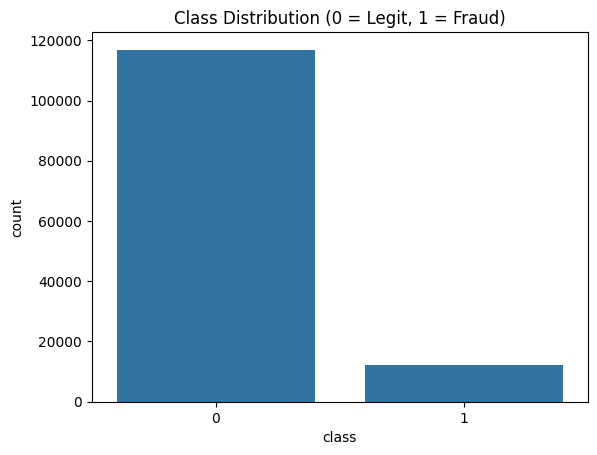

In [9]:
plt.figure()
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


The dataset is highly imbalanced, with fraudulent transactions forming a small minority.
This necessitates resampling techniques and imbalance-aware evaluation metrics.


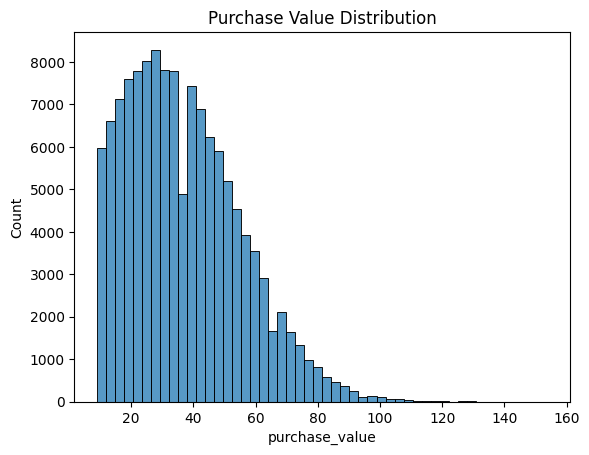

In [10]:
plt.figure()
sns.histplot(fraud_df['purchase_value'], bins=50)
plt.title("Purchase Value Distribution")
plt.show()


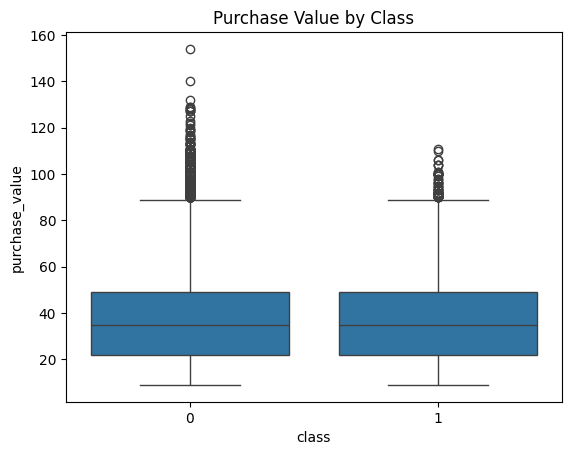

In [11]:
plt.figure()
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value by Class")
plt.show()


Fraudulent transactions tend to have higher purchase values, indicating attempts
to maximize gain per transaction.


In [12]:
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)


In [13]:
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)

ip_df.head()


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [14]:
def get_country(ip):
    row = ip_df[
        (ip_df['lower_bound_ip_address'] <= ip) &
        (ip_df['upper_bound_ip_address'] >= ip)
    ]
    return row['country'].values[0] if not row.empty else 'Unknown'

fraud_df['country'] = fraud_df['ip_int'].apply(get_country)


In [15]:
country_fraud_rate = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False)

country_fraud_rate.head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64

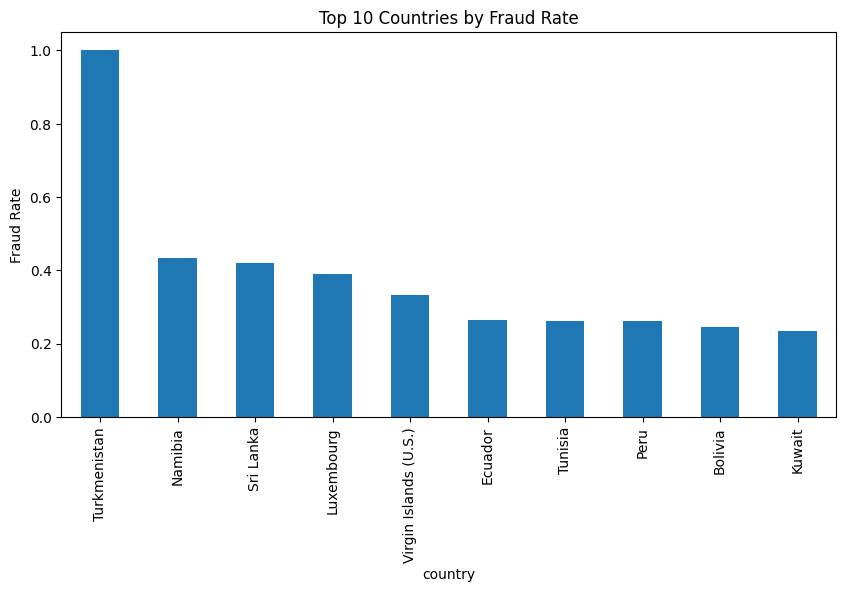

In [16]:
plt.figure(figsize=(10,5))
country_fraud_rate.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()


Certain countries exhibit significantly higher fraud rates.
This suggests that geolocation is a valuable signal for fraud detection
and can be used for risk-based transaction screening.


In [17]:
fraud_df['time_since_signup'] = (
    fraud_df['purchase_time'] - fraud_df['signup_time']
).dt.total_seconds()


In [18]:
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek


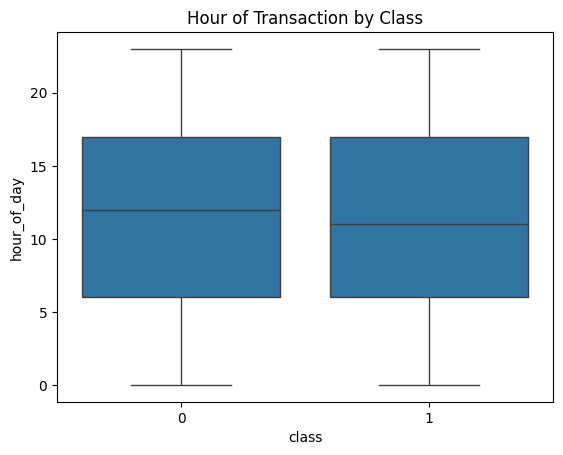

In [19]:
plt.figure()
sns.boxplot(x='class', y='hour_of_day', data=fraud_df)
plt.title("Hour of Transaction by Class")
plt.show()


Fraudulent transactions are more likely to occur during unusual hours,
suggesting automated or opportunistic behavior.


In [20]:
output_path = r"C:\Users\jkk\OneDrive\Desktop\fraud-detection\data\processed\fraud_clean.csv"
fraud_df.to_csv(output_path, index=False)
